In [1]:
import numpy as np, matplotlib.pyplot as plt

In [2]:
def geo(z,k):
    #Pr[G[z]=k] = (1 - exp[-z])/(1 + exp[-z])*exp[-z|k|].
    return (1-np.exp(-z))/(1+np.exp(-z))*np.exp(-z*np.abs(k))

In [79]:
def percentile(z, threshold):
    value=0
    done=False
    k=-1000000
    prob=0
    while done==False:
        k+=1
        prob+= geo(z,k)
        if prob>= threshold:
            return k
        
        
        
    

In [81]:
percentile(z_for_dp(.75),.05)

-40

In [82]:
percentile(z_for_dp(4),.05)

-8

In [119]:
percentile(z_for_dp(4),.95)

8

In [7]:
geo(.03,5)

0.012909651437041144

In [44]:
def z_for_dp(eps):
    return eps*.25*.675*.9/2.0
    
def z_for_bin(eps):
    return eps*.25*0.1/2.0

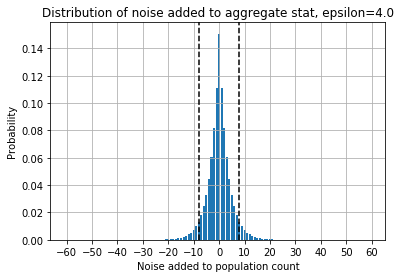

In [123]:
number= 60
true=0
z=z_for_dp(4)
changes=[ i for i in range(-number,number)]
probs= list(map(lambda k : geo(z,k), changes))
xs=[i + true for i in changes]

plt.xlabel('Noise added to population count')
plt.ylabel('Probability')
plt.xticks(np.arange(true-number, true+number+1, step=10))
plt.yticks(np.arange(0, .19, step=.02))


plt.bar(xs, probs)
plt.axvline(x=percentile(z_for_dp(4),.05), color='k', linestyle='--')
plt.axvline(x=-percentile(z_for_dp(4),.05), color='k', linestyle='--')

plt.ylim((0,.159))
plt.title('Distribution of noise added to aggregate stat, epsilon=4.0')
plt.grid()
plt.savefig('noise4.pdf')

In [92]:
percentile(z_for_dp(4),.05)

-8

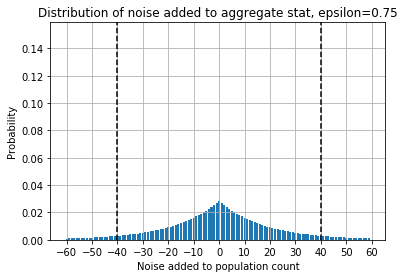

In [124]:
number= 60
true=0
z=z_for_dp(.75)
changes=[ i for i in range(-number,number)]
probs= list(map(lambda k : geo(z,k), changes))
xs=[i + true for i in changes]
plt.grid()
plt.xlabel('Noise added to population count')
plt.ylabel('Probability')
plt.xticks(np.arange(true-number, true+number+1, step=10))
plt.yticks(np.arange(0, .19, step=.02))
plt.title('Distribution of noise added to aggregate stat, epsilon=0.75')
plt.ylim((0,.159))
plt.axvline(x=percentile(z_for_dp(.75),.05), color='k', linestyle='--')
plt.axvline(x=-percentile(z_for_dp(.75),.05), color='k', linestyle='--')
plt.bar(xs, probs)
plt.savefig('noise75.pdf')
